# Identificar fronteras no lineales...

In [88]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [71]:
X, Y = make_circles(100, factor = 0.1, noise = 0.1)

In [73]:
def plt_svc(model, ax = None, plot_support = True):
    """Plot de la función de decisión para una clasificación en 2D con CSV"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos la parrilla de puntos para evaluar el modelo.
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30) 
    Y, X = np.meshgrid(yy, xx)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X, Y, P, colors = "k", levels = [-1, 0, 1], alpha = 0.5, linestyles = ["--", "-", "--"])
    
    #print(model.support_vectors_)
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s = 300, linewidth = 1, facecolor = "green")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

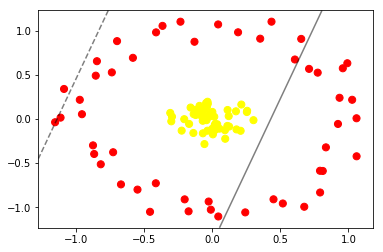

In [74]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
plt_svc(SVC(kernel = "linear").fit(X, Y), plot_support = False)

In [75]:
r = np.exp(-(X ** 2).sum(1))
r

array([0.2619234 , 0.36844248, 0.96325462, 0.43940106, 0.31639822,
       0.95823981, 0.30577951, 0.96796515, 0.41688691, 0.32555069,
       0.26700953, 0.99916215, 0.36722287, 0.96924168, 0.97979549,
       0.93365459, 0.32100289, 0.98408246, 0.37632107, 0.37913221,
       0.98123232, 0.99456602, 0.96926014, 0.95789522, 0.38897792,
       0.49477156, 0.39405477, 0.25073558, 0.38587234, 0.27068777,
       0.98298174, 0.94092671, 0.42296466, 0.42521386, 0.34754923,
       0.28643253, 0.44959591, 0.91469734, 0.28728575, 0.93054356,
       0.33193886, 0.97216272, 0.98489339, 0.95583861, 0.99874221,
       0.50907076, 0.91185432, 0.9562004 , 0.97008803, 0.97742132,
       0.98437825, 0.43769788, 0.28048715, 0.28681016, 0.98192817,
       0.99103593, 0.26786661, 0.98474439, 0.40107115, 0.29439999,
       0.41644887, 0.3077031 , 0.32431521, 0.91285378, 0.9950828 ,
       0.92895831, 0.97812589, 0.94264542, 0.43922761, 0.98551585,
       0.99680848, 0.98783863, 0.27196528, 0.36734169, 0.99360

In [76]:
from mpl_toolkits import mplot3d

In [77]:
def plot_3D(elev = 30, azim = 30, X = X, Y = Y, r = r):
    ax = plt.subplot(projection = "3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c = Y, s = 50, cmap = "autumn")
    ax.view_init(elev = elev, azim = azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("x[1]")
    ax.set_zlabel("r")

In [78]:
from ipywidgets import interact, fixed

In [81]:
interact(plot_3D, 
         elev = [-90, -60, -30, 0, 30, 60, 90], 
         azim = [-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], 
         X = fixed(X), 
         Y = fixed(Y), 
         r = fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.15687449e+00, -3.66687015e-02],
       [-9.75267683e-01,  2.17539893e-01],
       [ 1.72779718e-01,  8.70899838e-02],
       [ 6.06237422e-01,  6.74402619e-01],
       [-8.49367195e-01,  6.55232050e-01],
       [-1.60722104e-01,  1.29713604e-01],
       [ 5.17506238e-01, -9.57642042e-01],
       [-1.71589891e-01, -5.58220434e-02],
       [ 7.73898694e-01,  5.25377104e-01],
       [ 1.05932449e+00,  8.29074564e-03],
       [ 7.91650868e-01, -8.32922462e-01],
       [ 1.33858229e-02,  2.56713409e-02],
       [-6.72526868e-01, -7.41278596e-01],
       [-7.03113681e-02, -1.62165351e-01],
       [-4.09818368e-02,  1.36864545e-01],
       [-2.26336225e-01, -1.31987293e-01],
       [-4.14561622e-01,  9.82061008e-01],
       [-6.15903269e-02,  1.10689718e-01],
       [-8.57981055e-01,  4.91101911e-01],
       [ 7.90874676e-01, -5.86845407e-01],
       [-3.68160706e-02, -1.32629576e-01],
       [-6.49191587e-02,  3.51325482e-02],
       

In [83]:
rbf = SVC(kernel = "rbf", C = 1E6)
rbf.fit(X, Y)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

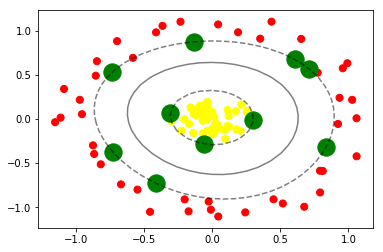

In [87]:
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:, 0], rbf.support_vectors_[:,1], s = 300, facecolor = "none")

## Ajustar los parámetros de SVM...

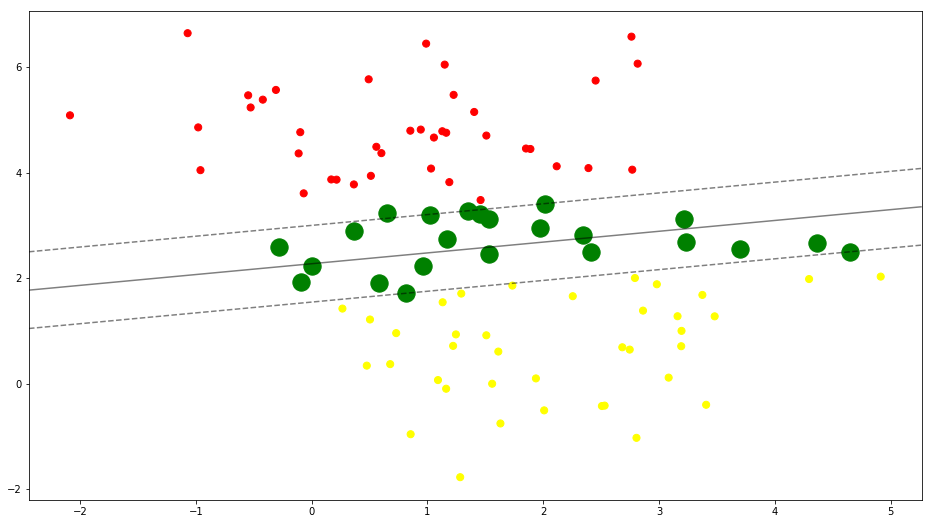

In [107]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.figure(figsize = (16, 9))
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")
model = SVC(kernel = "linear", C = 10)
model.fit(X, Y)
plt_svc(model)

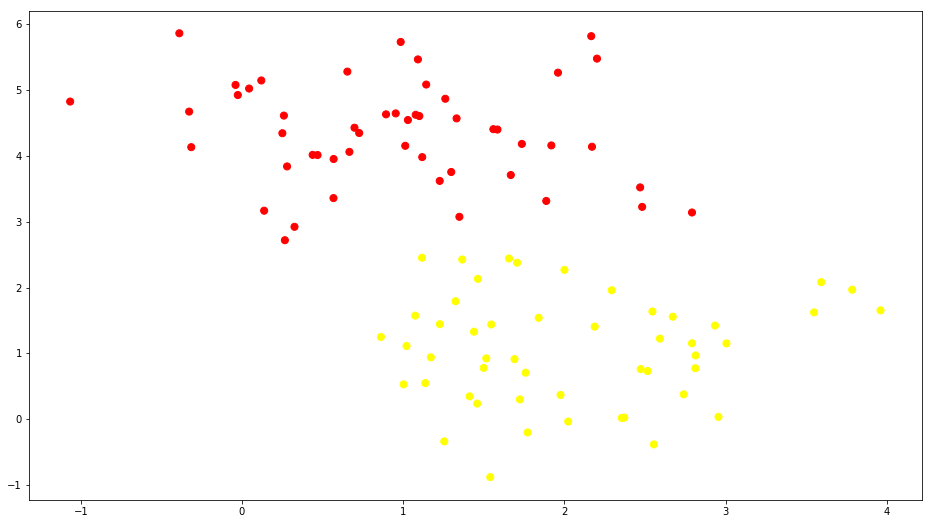

In [93]:
X, Y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)
plt.figure(figsize = (16, 9))
plt.scatter(X[:, 0], X[:, 1], c = Y, s = 50, cmap = "autumn")

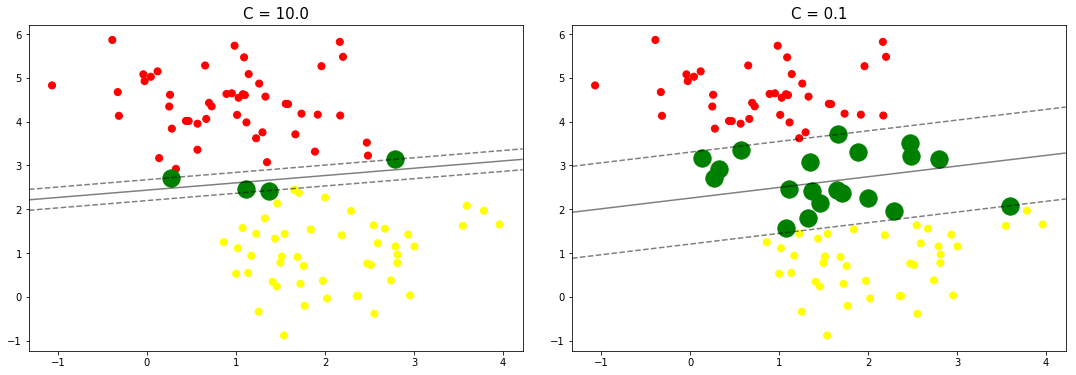

In [98]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace = 0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = "linear", C = C)
    model.fit(X, Y)
    ax_i.scatter(X[:, 0], X[:, 1], c = Y,  s = 50, cmap = "autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)